### 데이터 불러오기

In [1]:
# pymysql import 
import pymysql

In [2]:
# mysql 연결
conn = pymysql.connect(host = '', # DB IP (local에 접속하는 경우 : localhost)
                     port = 3306, # 포트 번호
                     user = '',
                     passwd = '', # mySQL 접속 계정 패스워드
                     db = 'movie', # 데이터베이스명
                     charset='utf8') # 한글 깨짐 방지

In [3]:
# DB 조회 결과를 dictionary로 저장
curs = conn.cursor(pymysql.cursors.DictCursor)

In [4]:
# movie 데이터 조회
sql = '''
SELECT * FROM movie
''' 
curs.execute(sql)

600

In [5]:
# 데이터 조회 결과를 result에 저장
result = curs.fetchall()
    
print(result[0])

{'title': '              개를 훔치는 완벽한 방법', 'distributor': '리틀빅픽처스', 'genre': '드라마', 'release_time': datetime.date(2014, 12, 31), 'time': 109, 'screening_rat': '전체 관람가', 'director': '김성호', 'dir_prev_bfnum': 495535.0, 'dir_prev_num': 1, 'num_staff': 292, 'num_actor': 8, 'box_off_num': 306642}


In [54]:
# pandas 라이브러리 import
import pandas as pd
# numpy 라이브러리 import
import numpy as np

In [28]:
# 데이터 프레임으로 result 결과 저장
df = pd.DataFrame(result)
print(df.columns) # columns
print(df.head())

Index(['title', 'distributor', 'genre', 'release_time', 'time',
       'screening_rat', 'director', 'dir_prev_bfnum', 'dir_prev_num',
       'num_staff', 'num_actor', 'box_off_num'],
      dtype='object')
                         title      distributor genre release_time  time  \
0                개를 훔치는 완벽한 방법           리틀빅픽처스   드라마   2014-12-31   109   
1              1789, 바스티유의 연인들  유니버설픽쳐스인터내셔널코리아   뮤지컬   2014-09-18   129   
2              18: 우리들의 성장 느와르              어뮤즈   느와르   2014-08-14   104   
3                     1999, 면회            인디스토리   드라마   2013-02-21    85   
4                          26년            인벤트 디    액션   2012-11-29   135   

  screening_rat director  dir_prev_bfnum  dir_prev_num  num_staff  num_actor  \
0        전체 관람가      김성호        495535.0             1        292          8   
1        전체 관람가      정성복             NaN             0          3          5   
2      청소년 관람불가      한윤선         35348.0             1        126          3   
3       15세 관람가   

In [29]:
# 상위 3개의 행만 조회
df.head(3)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개를 훔치는 완벽한 방법,리틀빅픽처스,드라마,2014-12-31,109,전체 관람가,김성호,495535.0,1,292,8,306642
1,"1789, 바스티유의 연인들",유니버설픽쳐스인터내셔널코리아,뮤지컬,2014-09-18,129,전체 관람가,정성복,NaN,0,3,5,4778
2,18: 우리들의 성장 느와르,어뮤즈,느와르,2014-08-14,104,청소년 관람불가,한윤선,35348.0,1,126,3,1124


### 데이터 살펴보기

In [30]:
# 데이터 프레임을 이루고 있는 컬럼명 추출
# 'title', 'time', 'screening_rat', 'release_time', 'num_staff','num_actor', 'genre', 'distributor', 'director', 'dir_prev_num', 'dir_prev_bfnum', 'box_off_num'의 컬럼들을 가지고 있음
df.columns

Index(['title', 'distributor', 'genre', 'release_time', 'time',
       'screening_rat', 'director', 'dir_prev_bfnum', 'dir_prev_num',
       'num_staff', 'num_actor', 'box_off_num'],
      dtype='object')

In [31]:
# 데이터 프레임의 행, 열 크기 확인
# 600개의 행과 12개의 열을 가지고 있음
df.shape

(600, 12)

In [32]:
# 데이터에 대한 전반적인 정보 확인
# 총 컬럼의 수는 600개이며, float 타입 1개, int 타입 5개, object 타입 6개로 구성
# dir_prev_bfnum이 270개로 NaN값이 330개 존재한다는 것을 유추할 수 있음
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


### 결측치 처리
- 0으로 대체하기
- 평균으로 대체하기

In [33]:
# 데이터프레임에 null 값이 존재하는지 확인
# dir_prev_bfnum에 Ture = null값이 존재한다는 것을 알 수 있음
pd.isnull(df)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
595,False,False,False,False,False,False,False,True,False,False,False,False
596,False,False,False,False,False,False,False,True,False,False,False,False
597,False,False,False,False,False,False,False,True,False,False,False,False
598,False,False,False,False,False,False,False,False,False,False,False,False


In [34]:
# 데이터프레임 각 컬럼에 null 값이 총 몇개 존재하는지 확인
# dir_prev_bfnum에 330개 존재
df.isnull().sum()

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    330
dir_prev_num        0
num_staff           0
num_actor           0
box_off_num         0
dtype: int64

In [35]:
# 결측값을 0으로 대체
df_zero = df.fillna(0)

In [36]:
# 하위 3개의 행만 보여줌
df_zero.tail(3)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
597,흉터,(주)키노아이,드라마,2011-10-13,65,15세 관람가,임우성,0.0,0,17,2,256
598,희망의 별 - 이퀘지레템바,마운틴 픽처스,다큐멘터리,2010-10-07,85,전체 관람가,이홍석,59648.5,2,1,2,1298
599,히말라야,CJ 엔터테인먼트,드라마,2015-12-16,124,12세 관람가,이석훈,3549470.0,4,520,2,7759711


# 예측 모델 생성
- 사이킷런의 linear_models 모듈 활용
- 독립변수: 'time', 'dir_prev_bfnum', 'dir_prev_num', 'num_staff', 'num_actor' (숫자로 구성된 변수만 사용)
- 종속변수: 'box_off_num'

### LinearRegression 클래스
- 예측값과 실제값의 RSS를 최소화해 OLS 추정방식으로 구현한 클래스

In [39]:
df_zero.columns

Index(['title', 'distributor', 'genre', 'release_time', 'time',
       'screening_rat', 'director', 'dir_prev_bfnum', 'dir_prev_num',
       'num_staff', 'num_actor', 'box_off_num'],
      dtype='object')

In [49]:
# 시각화를 위해 pyplot, seaborn 임포트
import matplotlib.pyplot as plt
import seaborn as sns

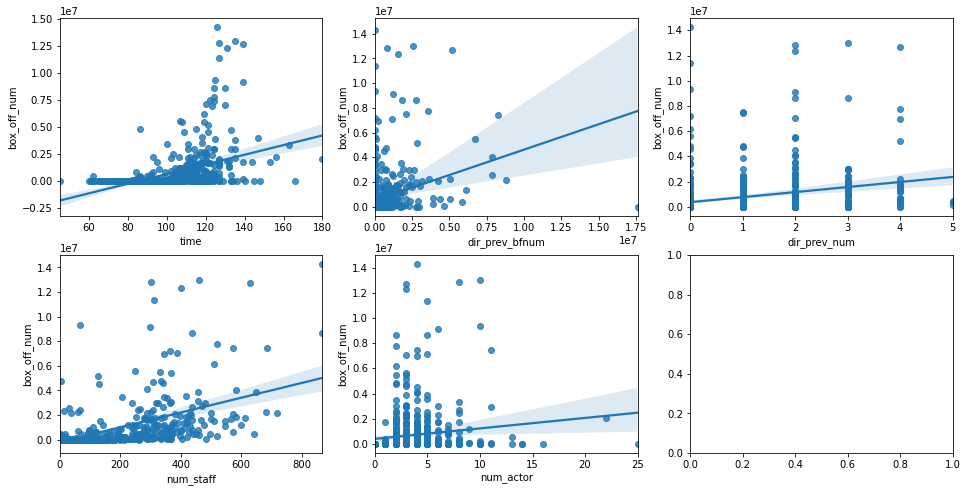

In [50]:
# 2개의 행과 4개의 열을 가진 subplots를 이용. axs는 4x2개의 ax를 가짐.
fig, axs = plt.subplots(figsize=(16,8) , ncols=3 , nrows=2)
lm_features = ['time', 'dir_prev_bfnum', 'dir_prev_num', 'num_staff', 'num_actor']
for i , feature in enumerate(lm_features):
    row = int(i/3)
    col = i%3
    # seaborn의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature , y='box_off_num',data=df_zero , ax=axs[row][col])

- 산점도와 선형회귀를 확인해 봤을 때, 눈에 띄는 선형성은 없음

In [51]:
# 사이킷런 라이브러리 임포트
# train 데이터와 test 데이터로 분리
from sklearn.model_selection import train_test_split
# 선형회귀 모델
from sklearn.linear_model import LinearRegression
# MSE와 R2 스코어를 확인
from sklearn.metrics import mean_squared_error , r2_score

In [52]:
# 종속변수 지정
y_target = df_zero['box_off_num']
# 독립변수로 지정할 컬럼
X_data = df_zero[['time', 'dir_prev_bfnum', 'dir_prev_num', 'num_staff', 'num_actor']]

# train 데이터와 test 데이터 분리 
# test_size: test 데이터의 비율, 기본값은 0.25
# random_state: 반복 연산 시에 동일한 결과를 얻기위해 고정시키는 값
X_train , X_test , y_train , y_test = train_test_split(X_data , y_target ,test_size=0.3, random_state=600)

In [57]:
# Linear Regression OLS로 학습/예측/평가 수행. 
lr = LinearRegression()
lr.fit(X_train ,y_train)
y_preds = lr.predict(X_test)

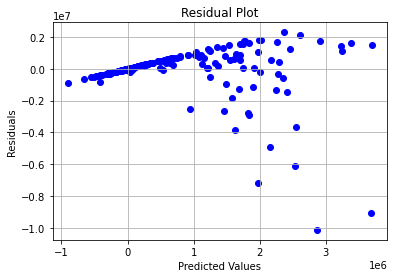

In [61]:
# 잔차를 플로트
plt.scatter(y_preds, y_preds- y_test, color = 'blue')
# x축에 따른 직선을 플로트
plt.hlines(y = 0, xmin = -10, xmax = 50, color = 'black') 
plt.title('Residual Plot')                                
plt.xlabel('Predicted Values')                          
plt.ylabel('Residuals')                                   
plt.grid()                                              

plt.show()  

In [62]:
# 평균 제곱 오차 확인

# 학습데이터에 대한 종속변수를 예측
y_train_pred = lr.predict(X_train) 

# 학습 데이터를 사용했을 때의 평균 제곱 오차를 출력
print('MSE train data: ', mean_squared_error(y_train, y_train_pred))
# 검증 데이터를 사용했을 때의 평균 제곱 오차를 출력
print('MSE test data: ', mean_squared_error(y_test, y_preds))         

MSE train data:  2169564837977.8005
MSE test data:  2474256078233.903


- MSE 값은 낮을 수록 좋은데 너무 큰 값이 나타남
- 성능이 좋지 않다는 것을 예상할 수 있음

In [64]:
# r2 score 확인
print('r2 train data: ', r2_score(y_train, y_train_pred))
print('r2 test data: ', r2_score(y_test, y_preds))

r2 train data:  0.3011438297654473
r2 test data:  0.3595594839749322


- r2 score는 1에 가까울 수록 좋지만 0.3이라는 값이 나타남
- 마찬가지로 성능이 좋지 않다는 것을 예상할 수 있음

In [66]:
# 러닝타임 120분, 평균 관객수 500명, 감독의 전 영화 개수 10개, 스텝수 30명, 주연배우 5명으로 예측한 결과
# -205002라는 이상한 결과를 얻음
print(lr.predict([[120, 5000, 10, 30, 5]]))

[-205002.9599246]
